<a href="https://colab.research.google.com/github/rich-hyun/Battle-of-the-Strongest-Statisticians/blob/main/competition_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. 라이브러리 불러오기

In [ ]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
import missingno as msno
import statsmodels.api as sm
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from matplotlib.ticker import MultipleLocator

warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


# 1. 데이터 형태 및 결측치 확인

##데이터 형태 확인

In [ ]:
wdc_day=pd.read_csv('https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv')
wdc_hour=pd.read_csv('https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011~2012_WDC_original_hour.csv')

In [ ]:
wdc_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
wdc_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
wdc_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
wdc_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##데이터 결측치 확인

In [ ]:
wdc_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<Axes: >

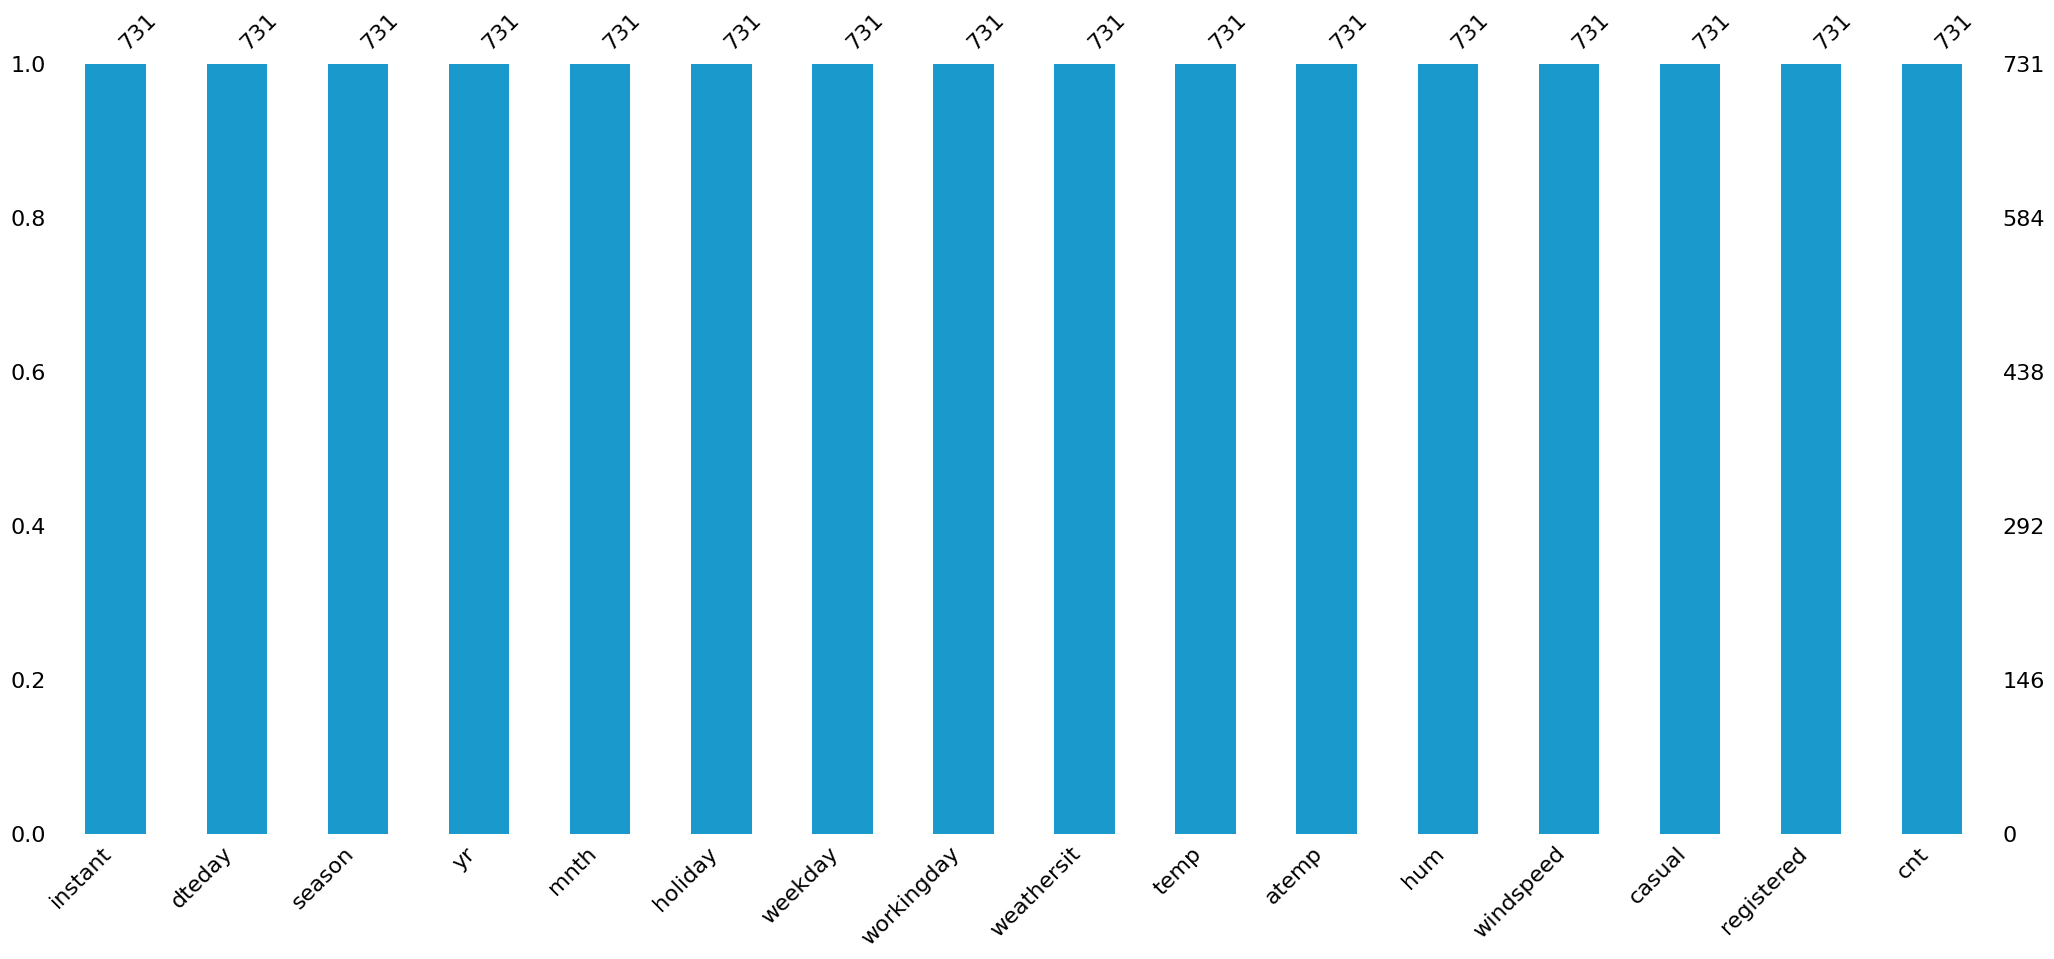

In [ ]:
msno.bar(wdc_day.iloc[:, :], color=(0.1, 0.6, 0.8))

<Axes: >

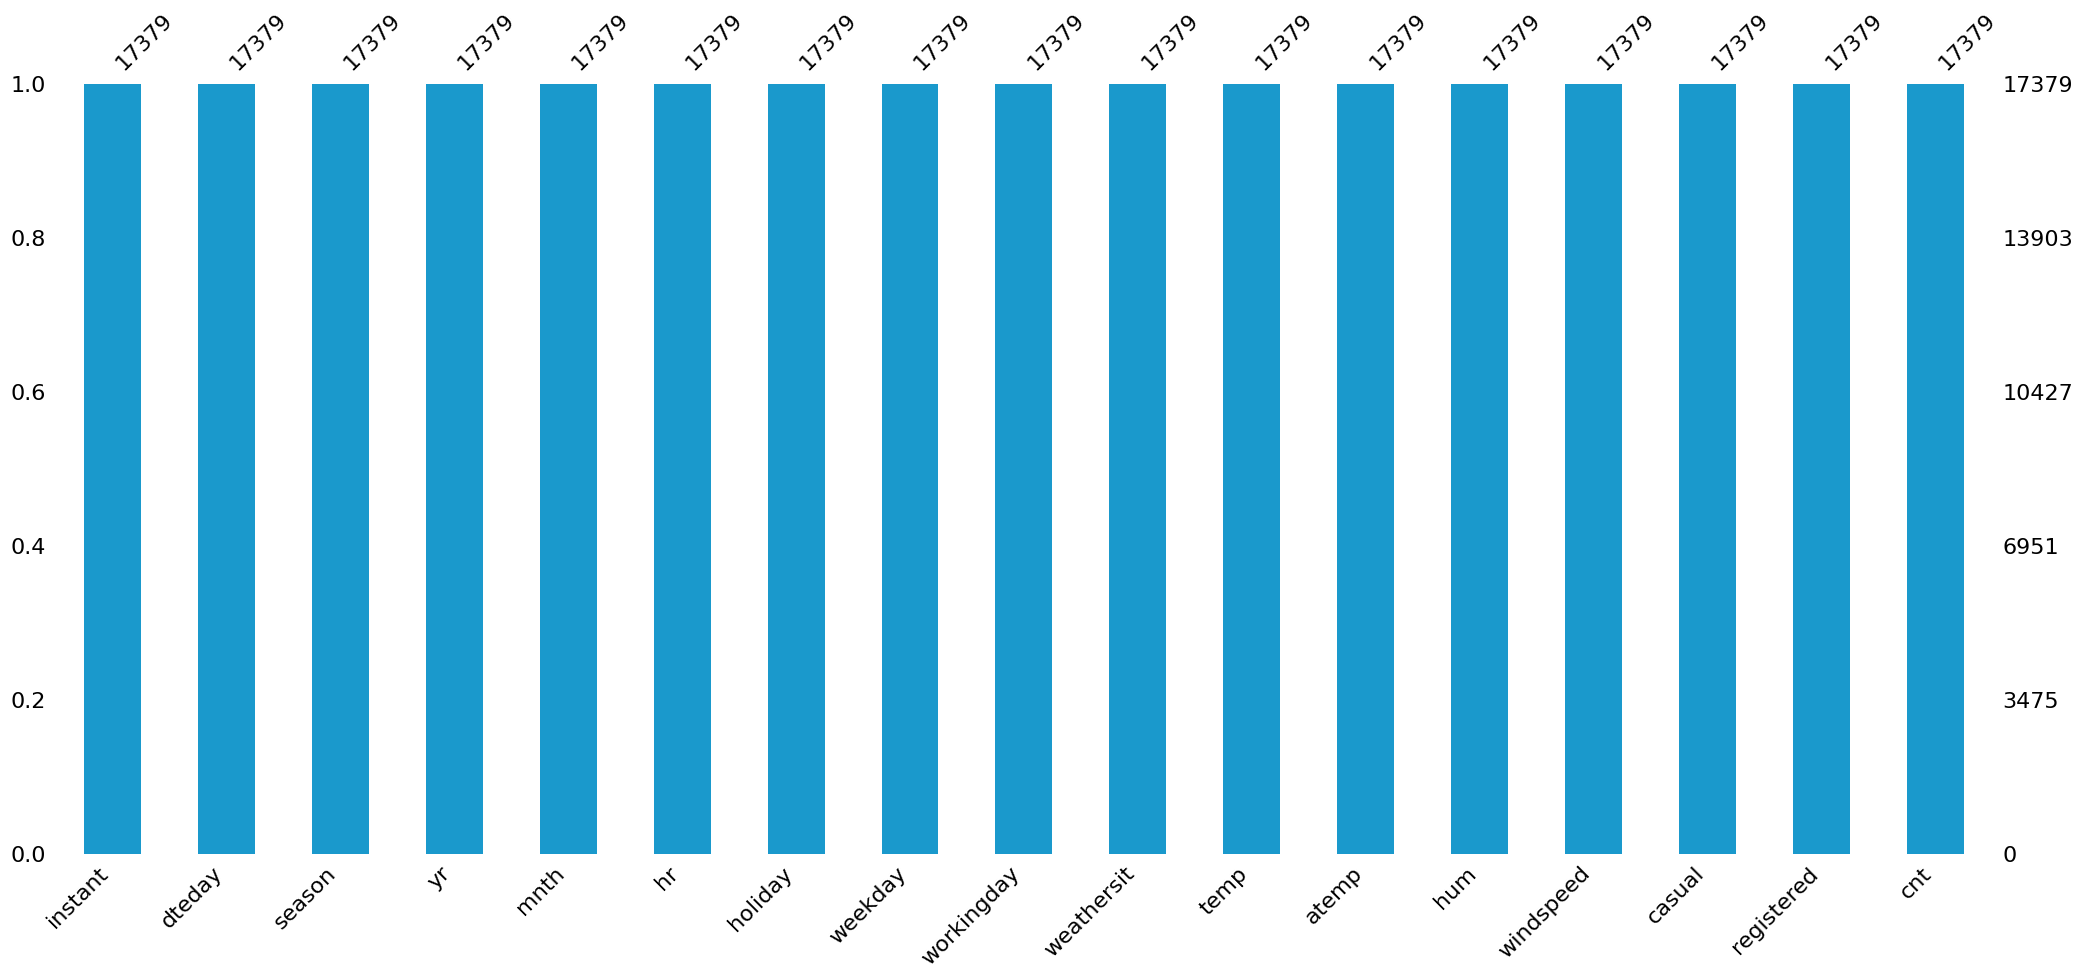

In [ ]:
msno.bar(wdc_hour.iloc[:, :], color=(0.1, 0.6, 0.8))

##시간 데이터 가공

In [ ]:
wdc_hour['dteday']=wdc_hour.dteday.apply(pd.to_datetime)
wdc_hour['day']=wdc_hour.dteday.apply(lambda x : x.day)

#2. 칼럼별 관계 확인하기

## 날씨 구분 기준 파악 ('weathersit','hum')

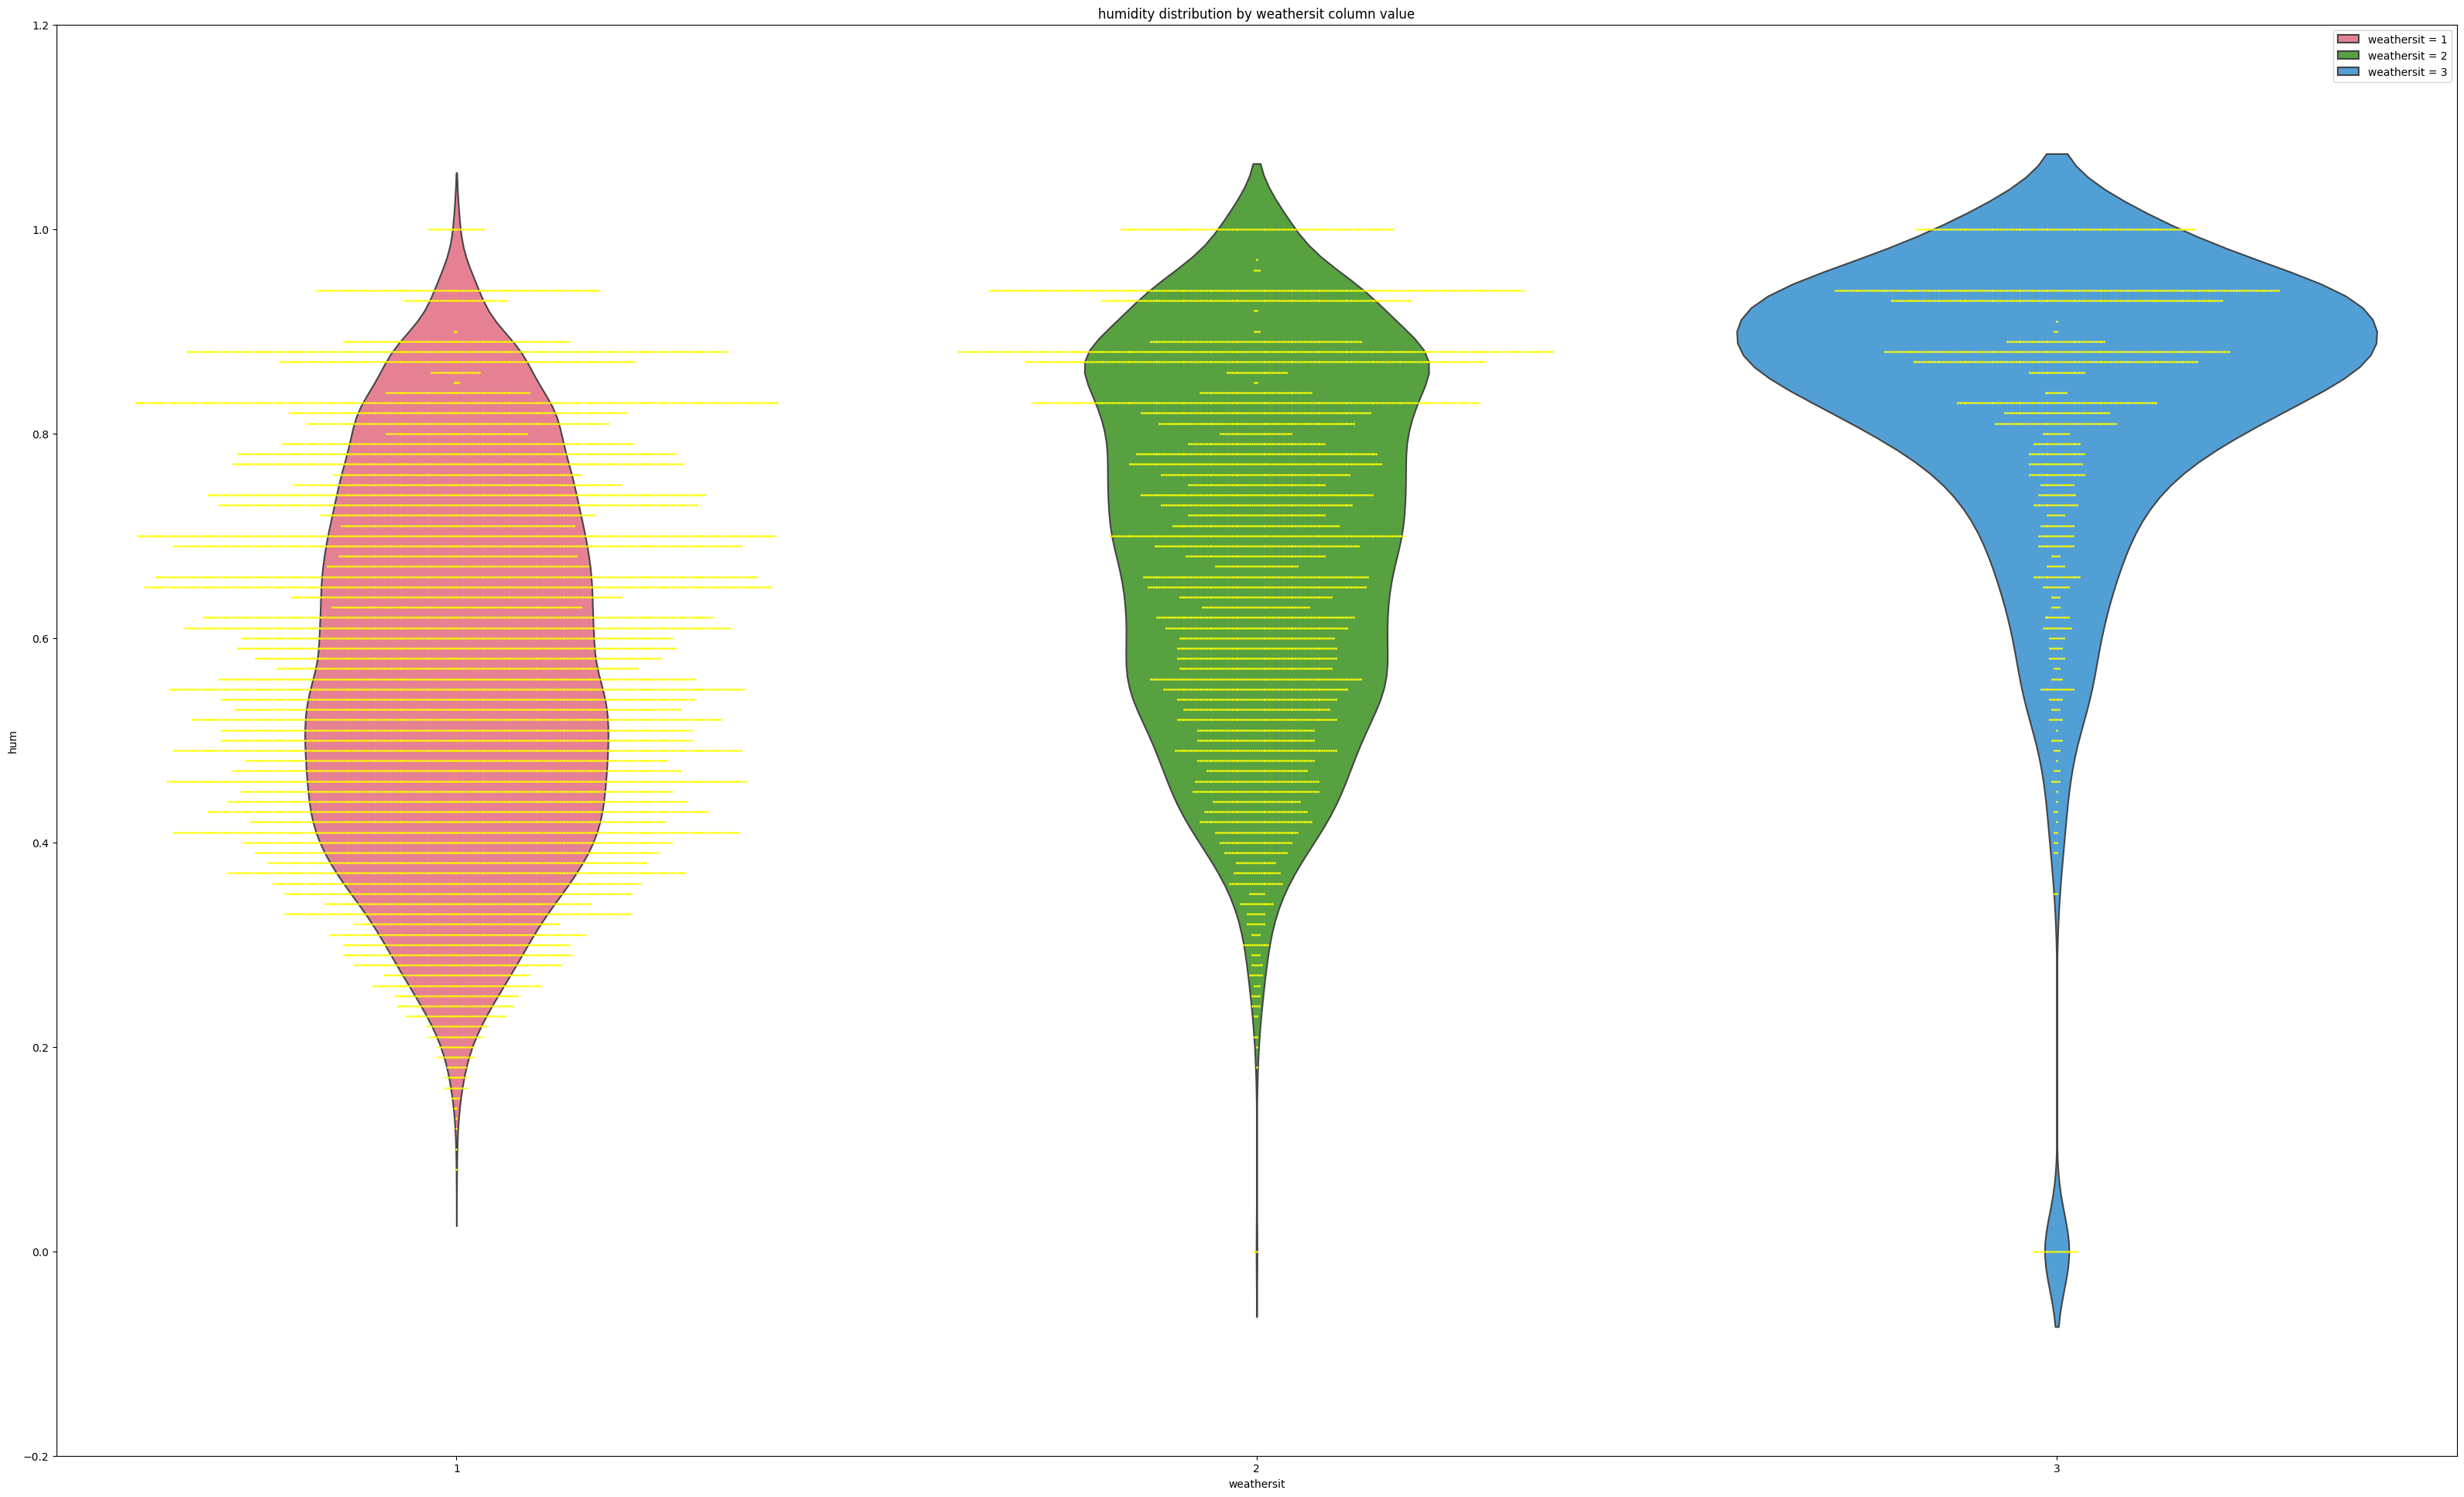

In [ ]:
f, ax = plt.subplots(figsize=(40, 24))
wdc_df_filtered = wdc_hour[wdc_hour['weathersit'] != 4]
sns.violinplot(data=wdc_df_filtered, x='weathersit', y='hum', palette='husl', inner=None, ax=ax)
sns.swarmplot(data=wdc_df_filtered, x='weathersit', y='hum', size=2, color='yellow', ax=ax)
plt.legend(["weathersit = 1", "weathersit = 2","weathersit = 3"])
ax.set_title('humidity distribution by weathersit column value')
plt.rcParams.update({'font.size': 37})
ax.set_ylim(-0.2,1.2)
plt.show()

## 계절 구분 기준 파악 및 계절 재설정 ('season', 'new_season', 'temp')

In [ ]:
wdc_hour['new_season'] = 0

for i in range(len(wdc_hour)):
    month = wdc_hour.loc[i, 'mnth']
    if month < 3:
        wdc_hour.loc[i, 'new_season'] = 4
    elif month < 6:
        wdc_hour.loc[i, 'new_season'] = 1
    elif month < 9:
        wdc_hour.loc[i, 'new_season'] = 2
    elif month < 12:
        wdc_hour.loc[i, 'new_season'] = 3
    else:
        wdc_hour.loc[i,'new_season'] = 4

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 19.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 27.3% of the points cannot be placed

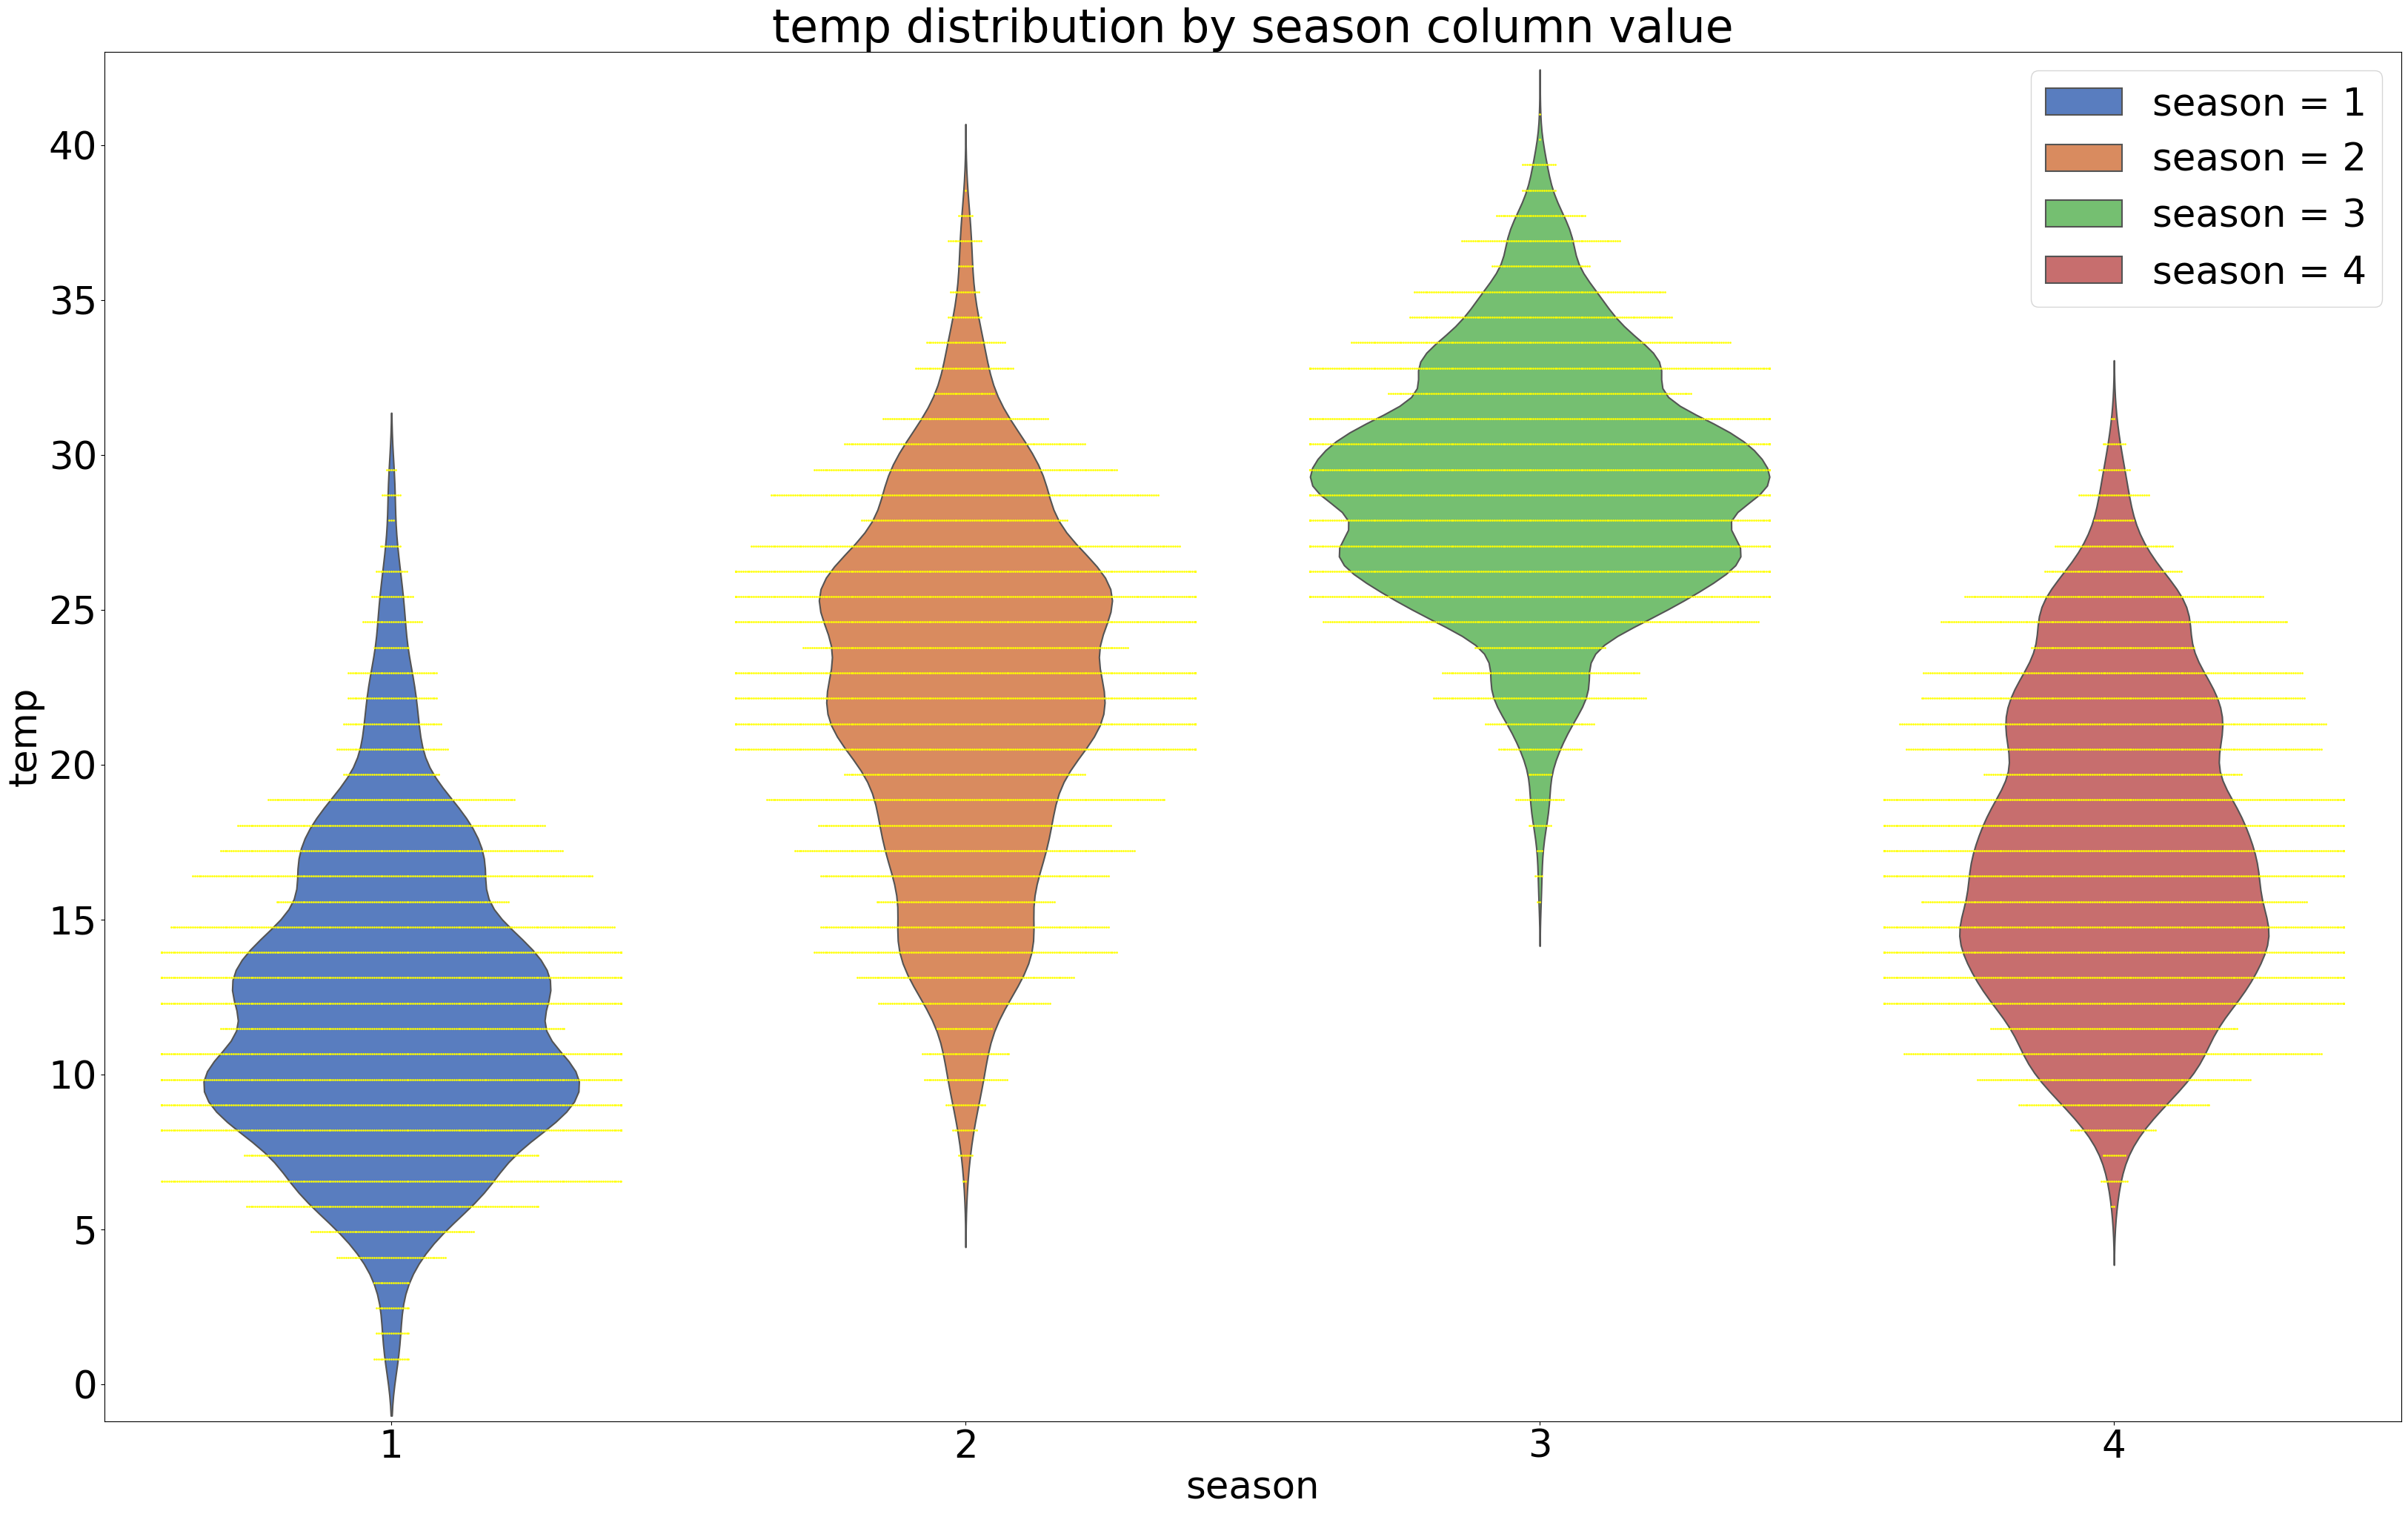

In [ ]:
wdc_hour['n_temp']=wdc_hour['temp']*41
f, ax = plt.subplots(figsize=(40, 24))
sns.violinplot(data=wdc_hour, x='season', y='n_temp', palette="muted", inner=None, ax=ax)
sns.swarmplot(data=wdc_hour, x='season', y='n_temp', size=2, color='yellow', ax=ax)
plt.legend(["season = 1", "season = 2","season = 3","season = 4"])
ax.set_title('temp distribution by season column value')
plt.rcParams.update({'font.size': 37})
ax.set_ylabel('temp')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 19.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


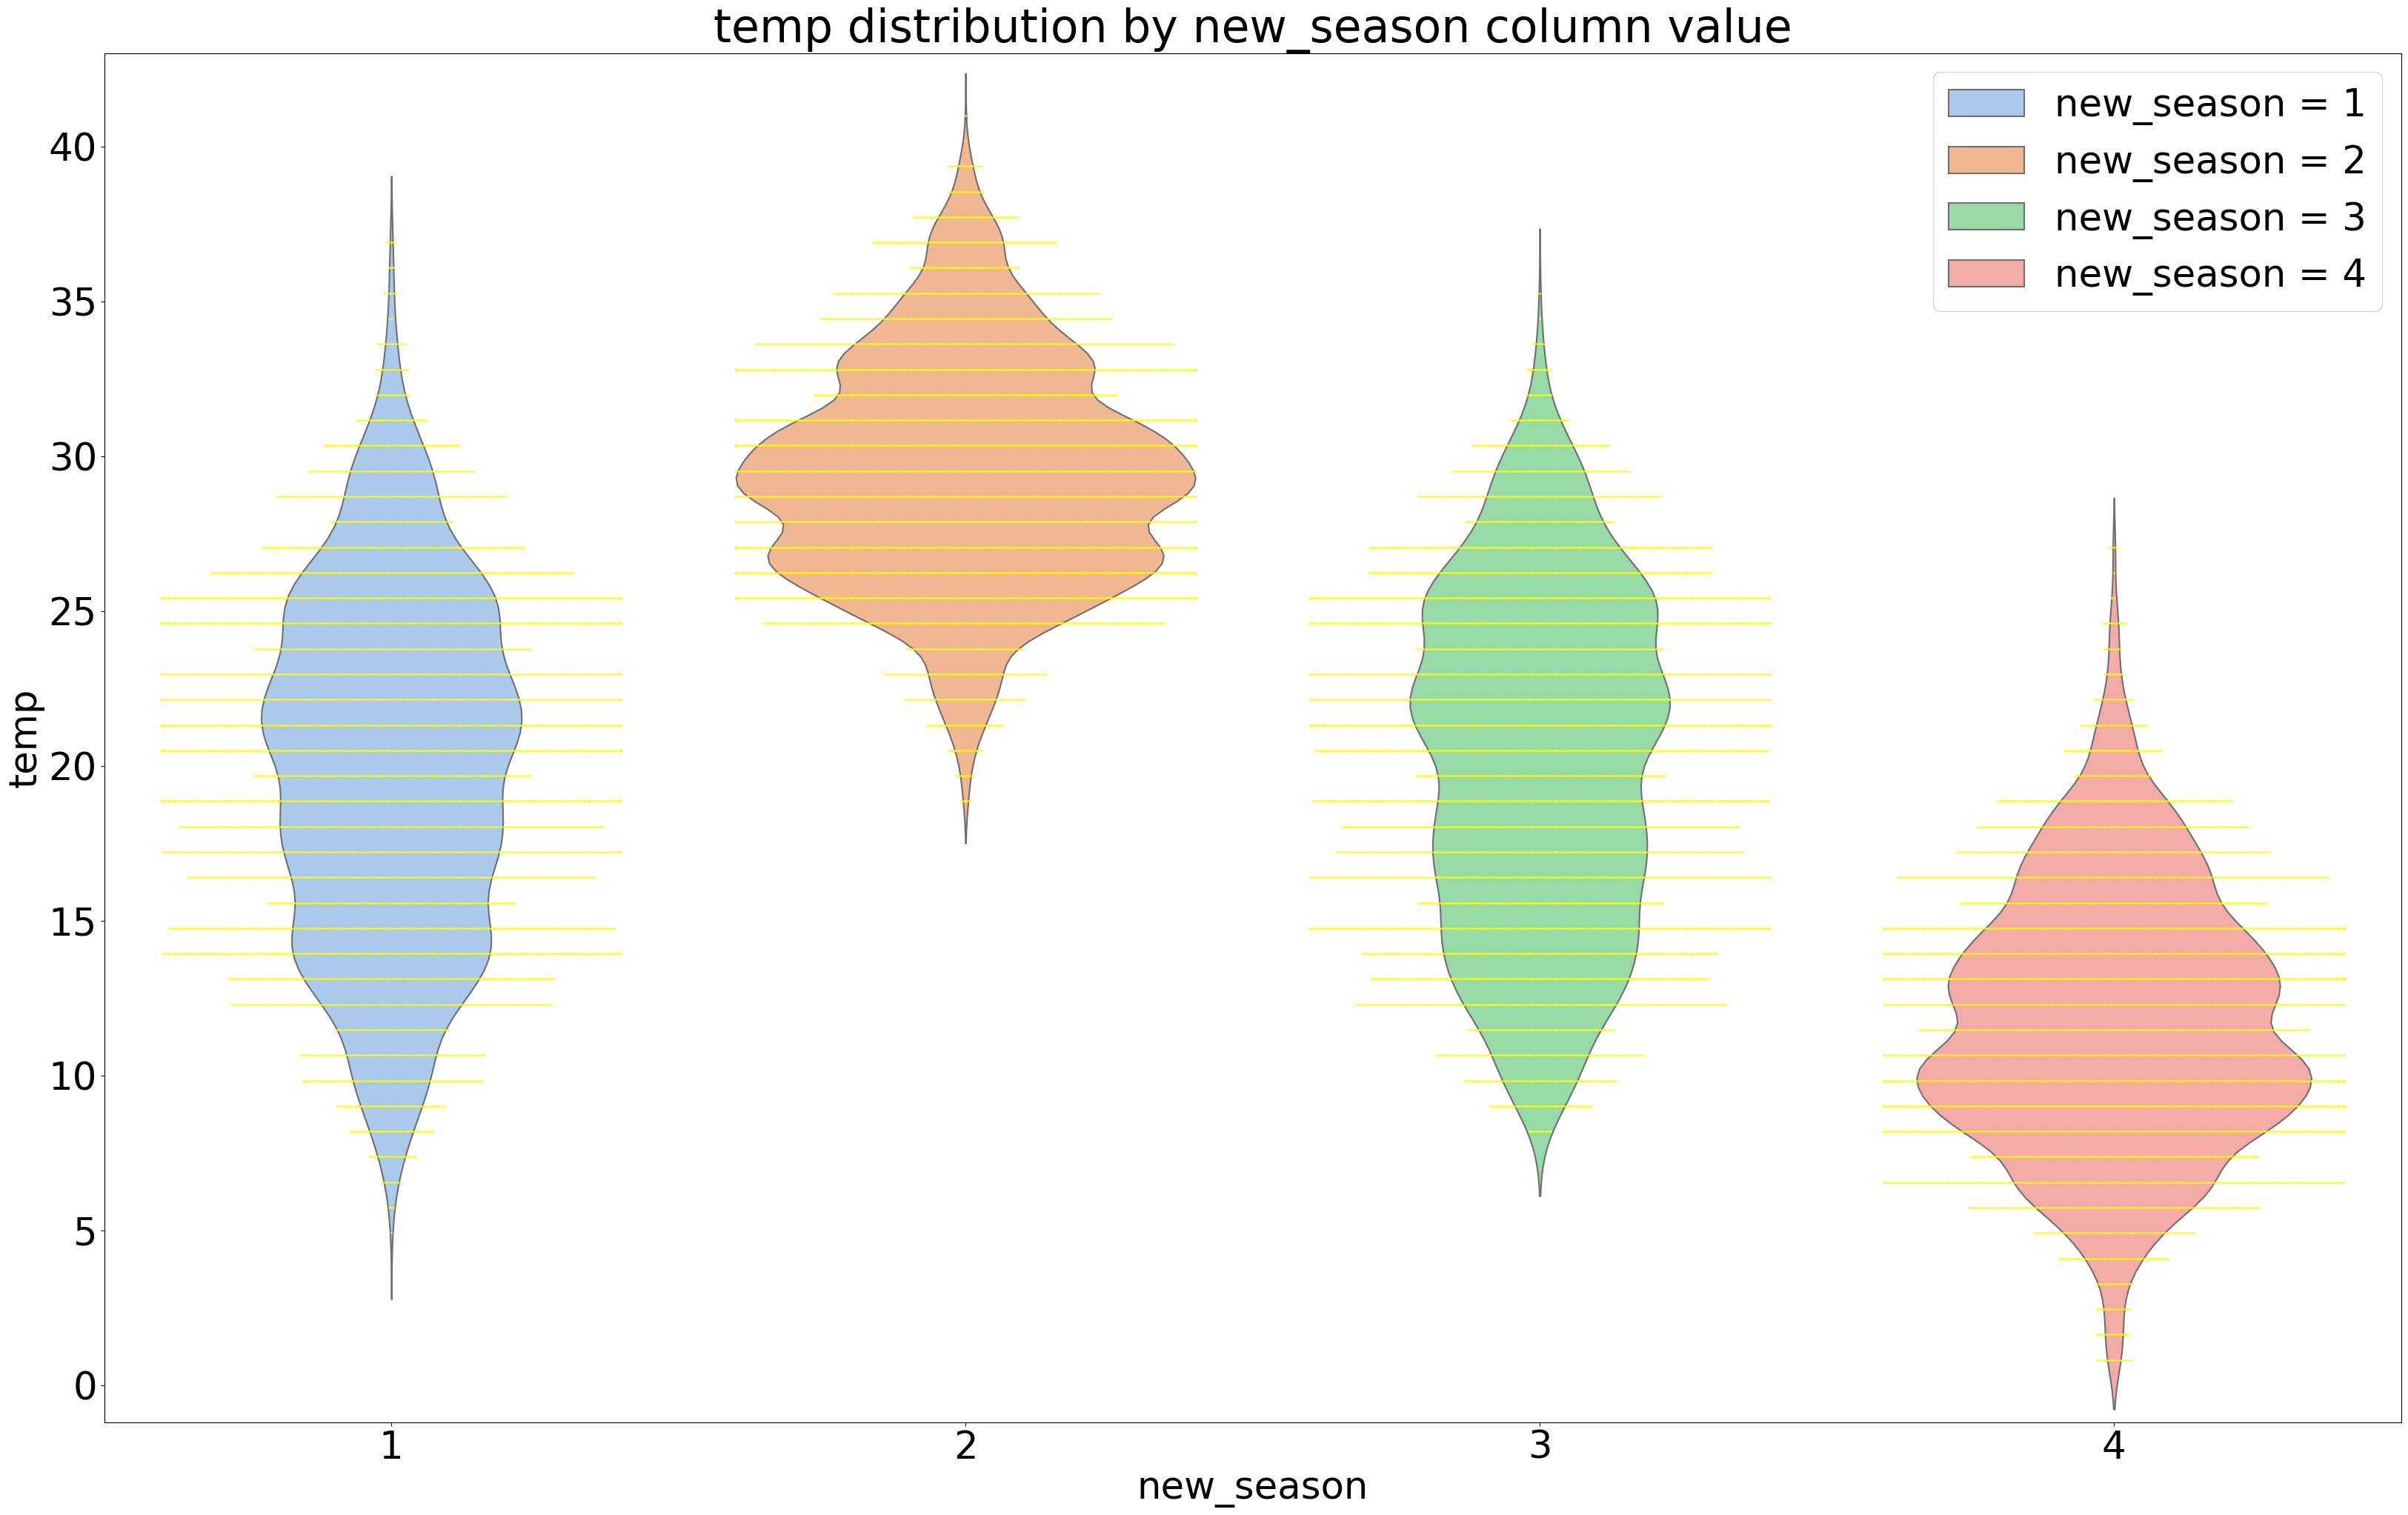

In [ ]:
wdc_hour['n_temp']=wdc_hour['temp']*41
f, ax = plt.subplots(figsize=(40, 24))
sns.violinplot(data=wdc_hour, x='new_season', y='n_temp', palette="pastel", inner=None, ax=ax)
sns.swarmplot(data=wdc_hour, x='new_season', y='n_temp', size=2, color='yellow', ax=ax)
plt.legend(["new_season = 1", "new_season = 2","new_season = 3","new_season = 4"])
ax.set_title('temp distribution by new_season column value')
plt.rcParams.update({'font.size': 37})
ax.set_ylabel('temp')
plt.show()

## 계절 별 날씨 및 대여 횟수('new_season','weathersit', 'count')

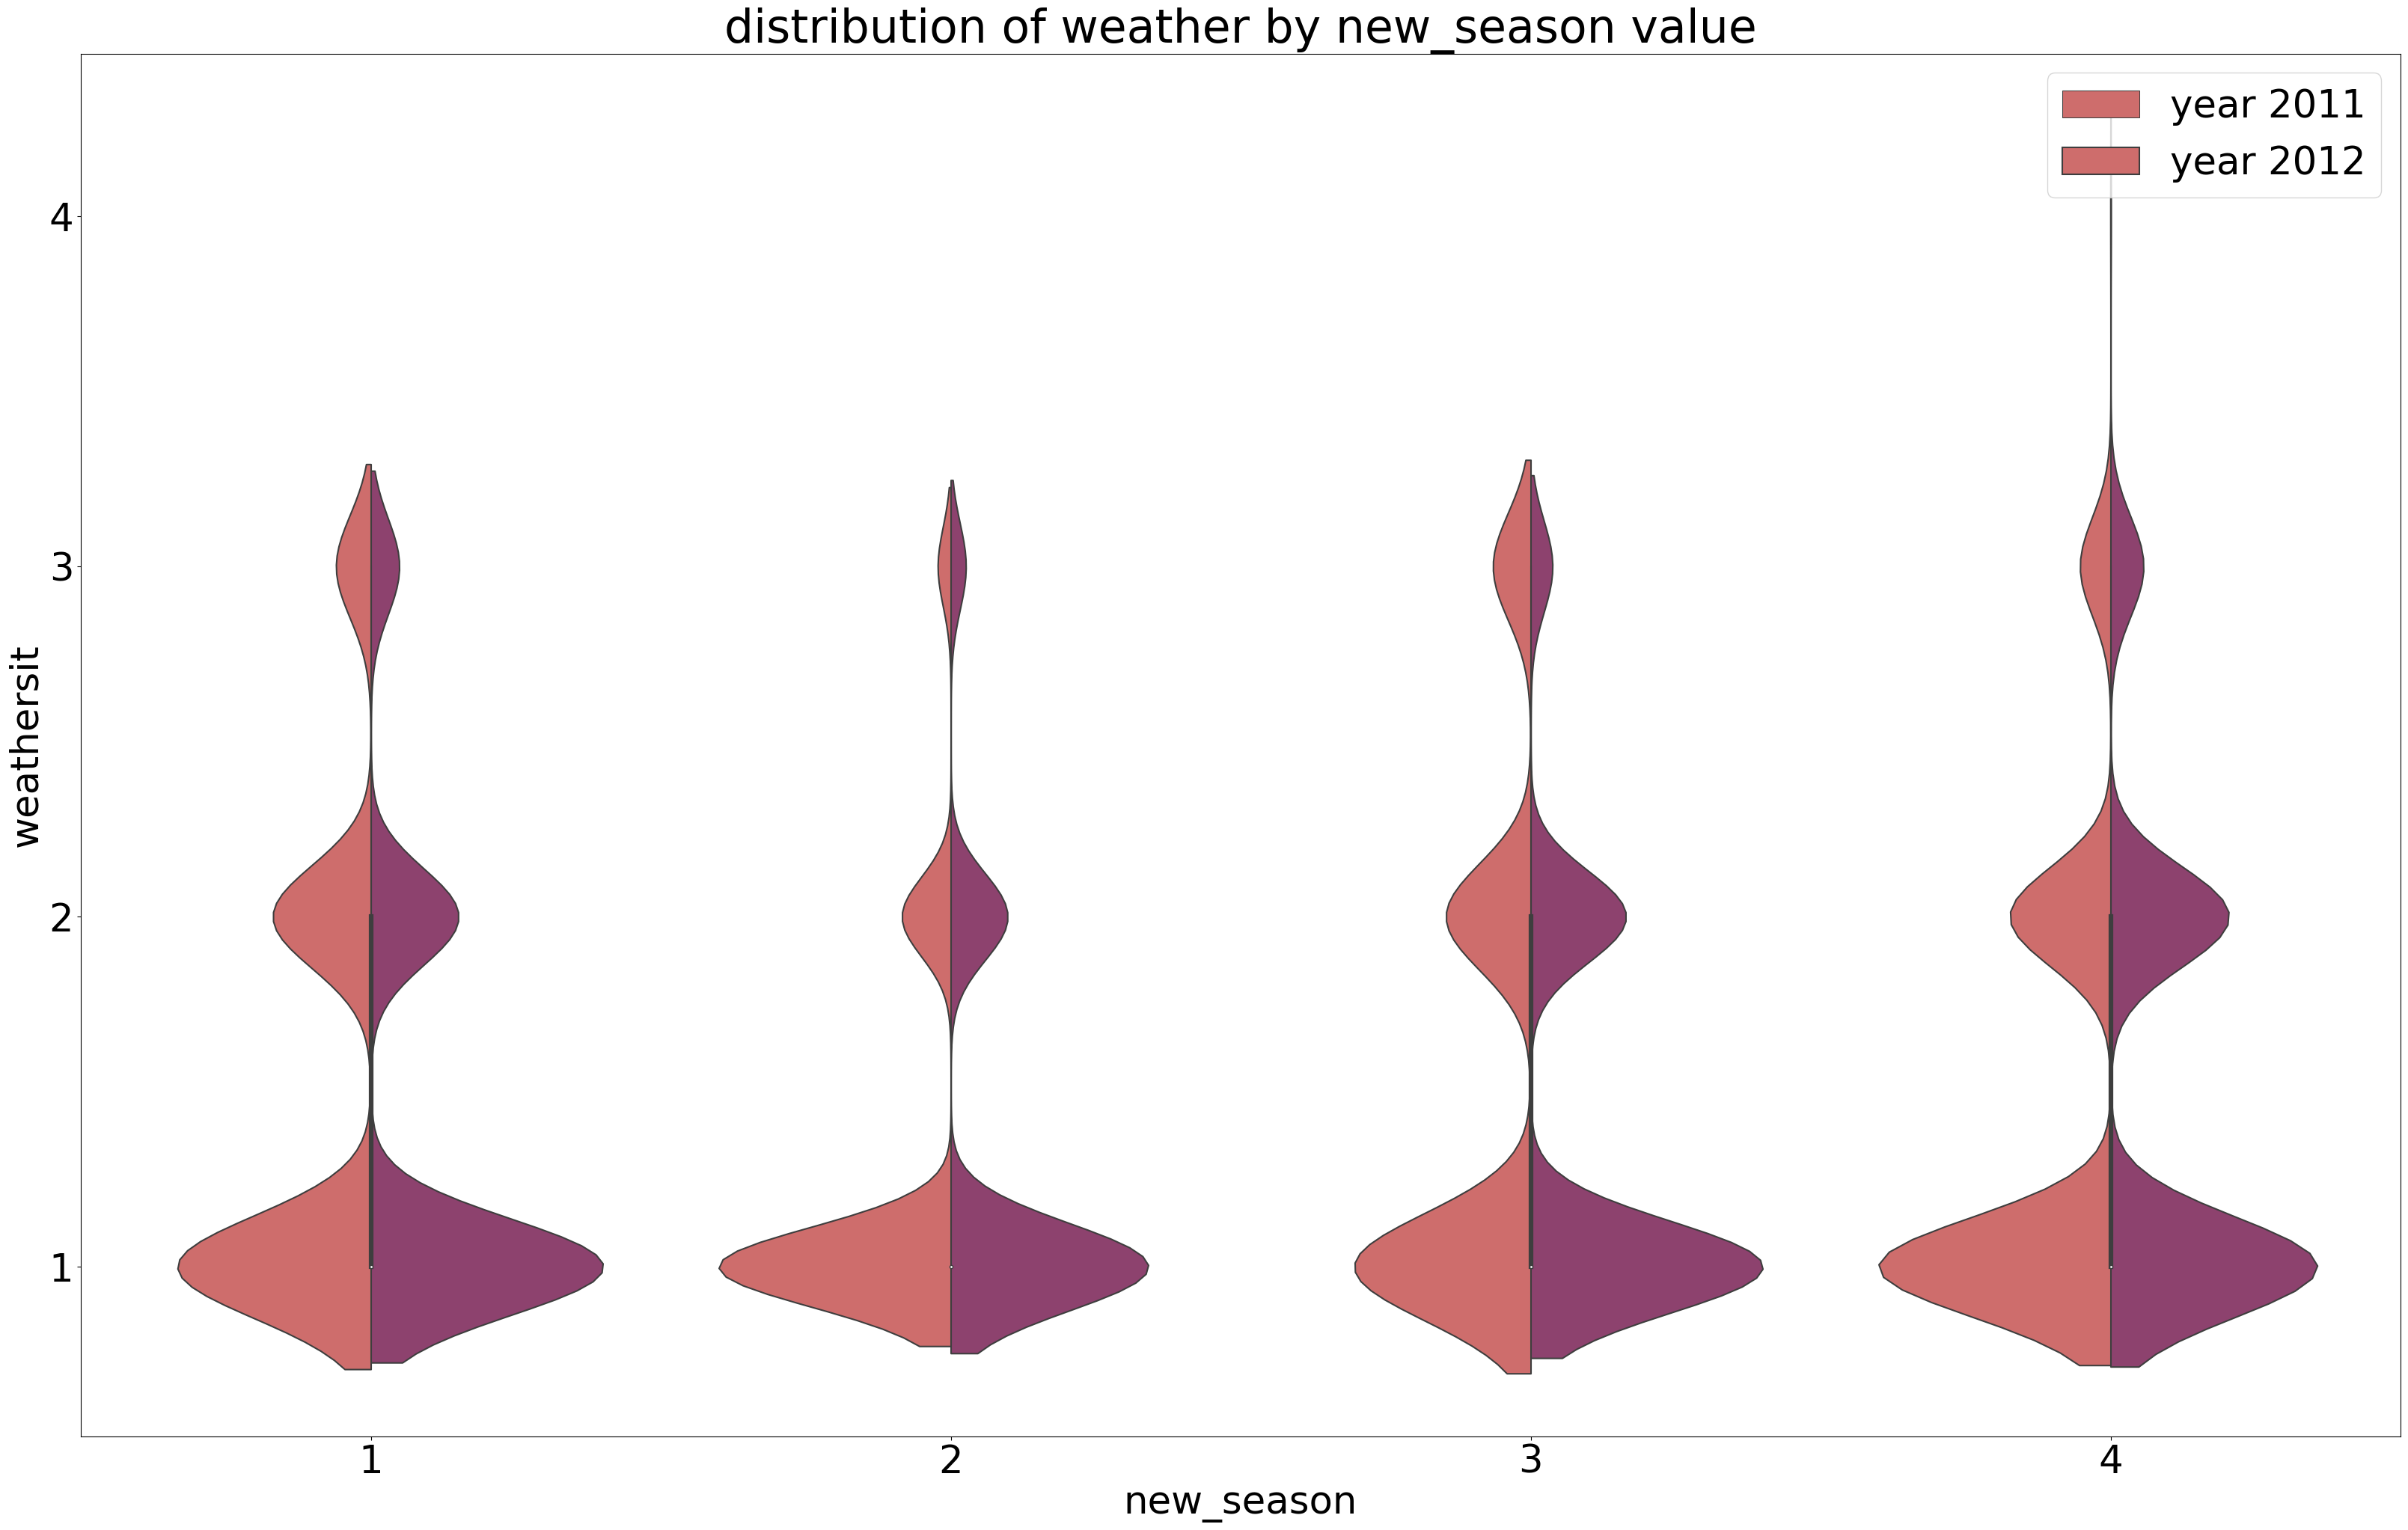

In [ ]:
f, ax = plt.subplots(figsize=(40, 24))
sns.violinplot(x= 'new_season', y = 'weathersit', hue = 'yr', data = wdc_hour,split=True,palette="flare")
plt.legend(["year 2011", "year 2012"])
ax.set_title('distribution of weather by new_season value')
plt.yticks(ticks=[1, 2, 3, 4])
plt.rcParams.update({'font.size': 37})

Text(0.5, 1.0, 'Count according to new_season by weather')

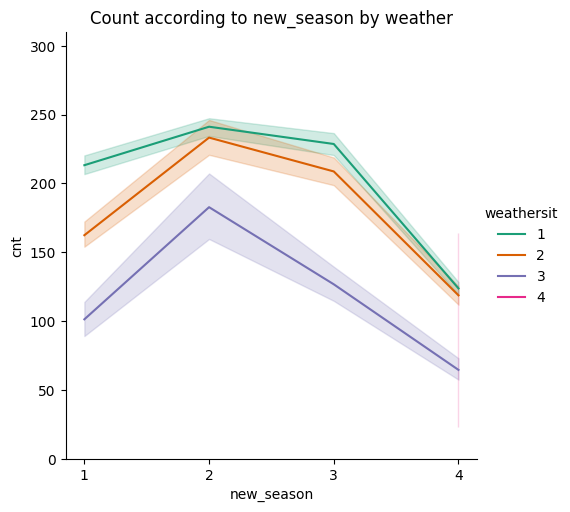

In [ ]:
#전체
plt.rcParams.update({'font.size': 10})
sns.relplot(data=wdc_hour, x="new_season", y="cnt", hue="weathersit", kind="line",palette="Dark2")
plt.ylim(0, 310)
plt.xticks(ticks=[1, 2, 3, 4])
plt.title('Count according to new_season by weather')

## 하루 대여 횟수 추이('hour', 'mnth', 'count', 'temp')

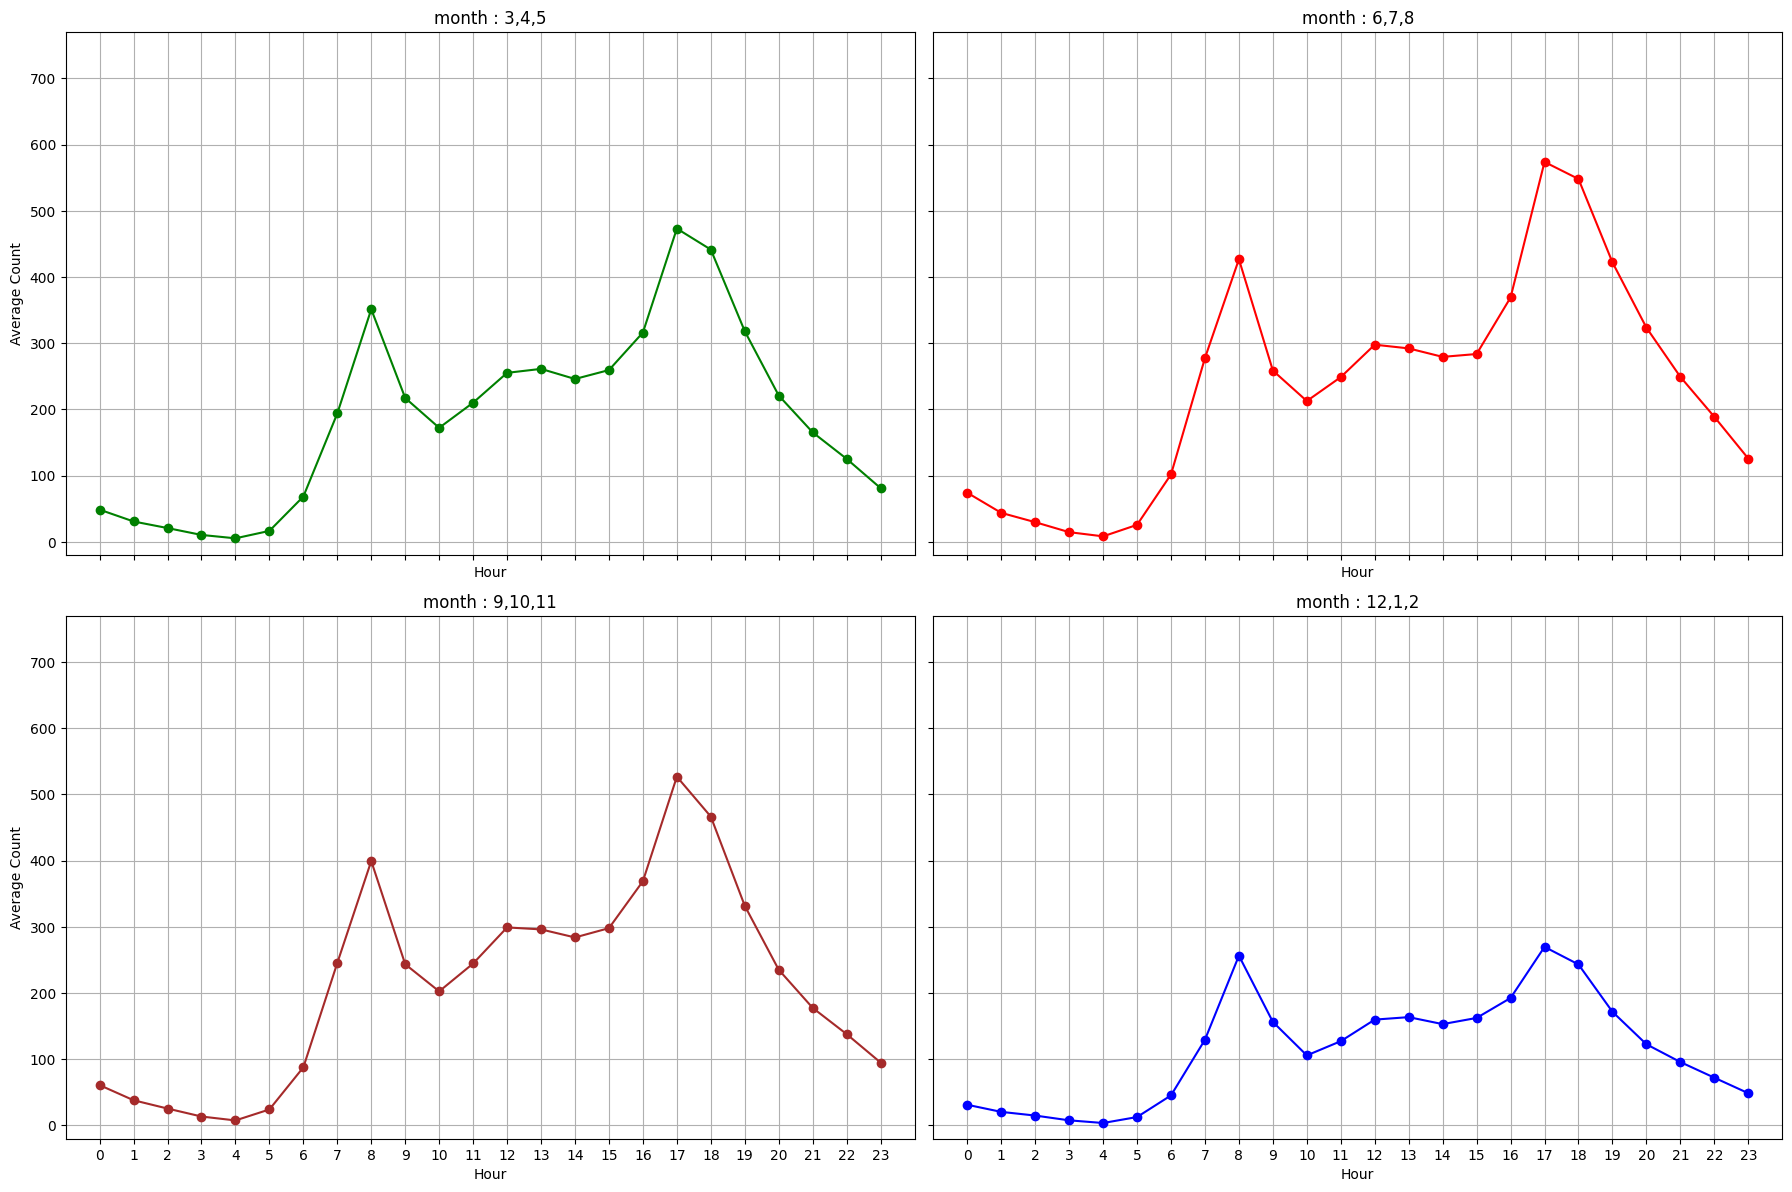

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12), sharex=True, sharey=True)

seasons = {
    1: 'month : 3,4,5',
    2: 'month : 6,7,8',
    3: 'month : 9,10,11',
    4: 'month : 12,1,2'
}
colors = ['green', 'red', 'brown', 'blue']
for i, (season_code, season_name) in enumerate(seasons.items()):
    season_data = wdc_hour[wdc_hour['new_season'] == season_code]
    combined_data = season_data.groupby(season_data['hr'])['cnt'].mean()

    row = (season_code - 1) // 2
    col = (season_code - 1) % 2
    axs[row, col].plot(combined_data.index, combined_data.values, marker='o', linestyle='-', color=colors[i])
    axs[row, col].set_title(season_name)
    axs[row, col].grid(True)
    axs[row, col].set_xticks(range(24))
    axs[row, col].set_xlabel('Hour')

for ax in axs[-1, :]:
    ax.set_xlabel('Hour')
    ax.set_xlim(-1, 24)
for ax in axs[:, 0]:
    ax.set_ylabel('Average Count')
    ax.set_ylim(-20, 770)

plt.tight_layout(pad=1.0)
plt.rcParams.update({'font.size': 10})

plt.show()

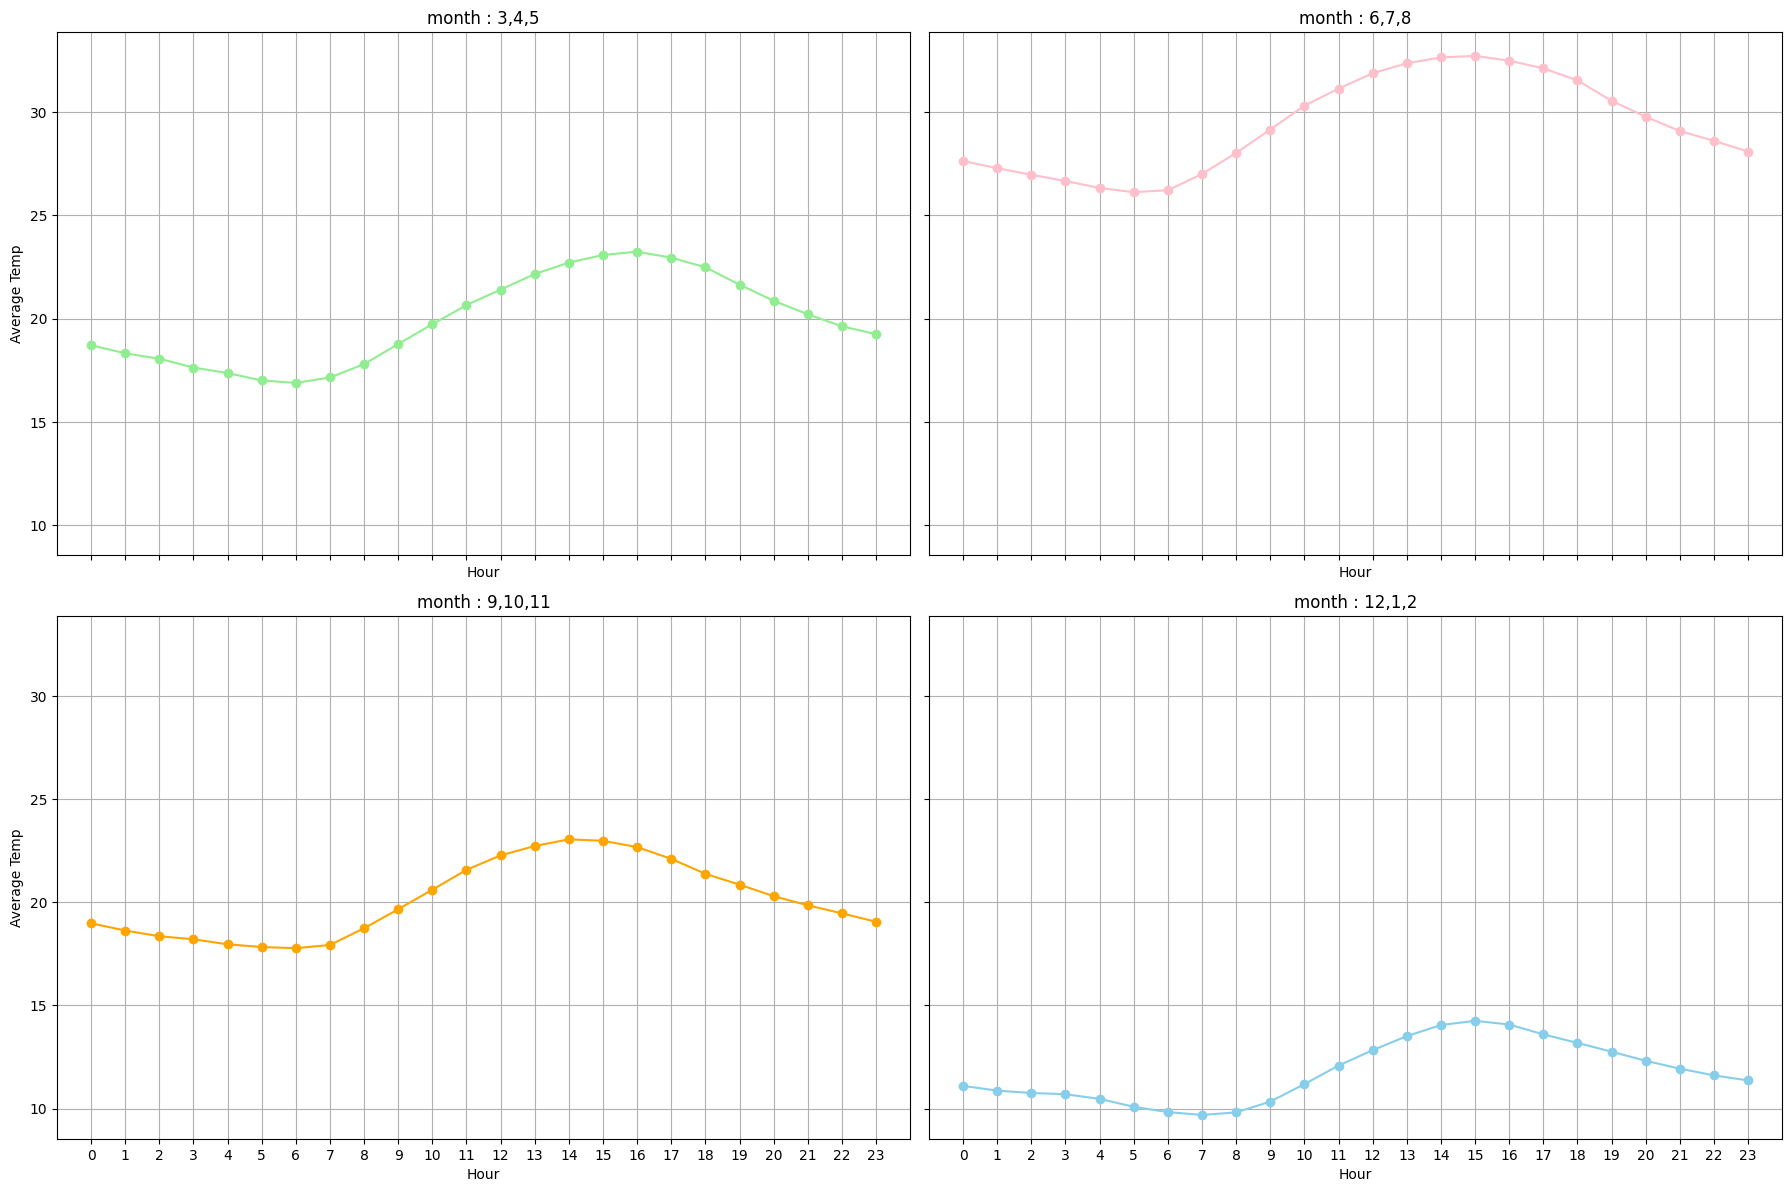

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12), sharex=True, sharey=True)

seasons = {
    1: 'month : 3,4,5',
    2: 'month : 6,7,8',
    3: 'month : 9,10,11',
    4: 'month : 12,1,2'
}
colors = ['lightgreen', 'pink', 'orange', 'skyblue']
for i, (season_code, season_name) in enumerate(seasons.items()):
    season_data = wdc_hour[wdc_hour['new_season'] == season_code]
    combined_data = season_data.groupby(season_data['hr'])['n_temp'].mean()

    row = (season_code - 1) // 2
    col = (season_code - 1) % 2
    axs[row, col].plot(combined_data.index, combined_data.values, marker='o', linestyle='-', color=colors[i])
    axs[row, col].set_title(season_name)
    axs[row, col].grid(True)
    axs[row, col].set_xticks(range(24))
    axs[row, col].set_xlabel('Hour')

for ax in axs[-1, :]:
    ax.set_xlabel('Hour')
    ax.set_xlim(-1, 24)
for ax in axs[:, 0]:
    ax.set_ylabel('Average Temp')

plt.tight_layout(pad=1.0)
plt.rcParams.update({'font.size': 10})

plt.show()

#3. day 데이터 모델 제작

## day 데이터 변수 가공

In [ ]:
data_wdc='https://raw.githubusercontent.com/rich-hyun/Battle-of-the-Strongest-Statisticians/main/2011%5EF2012_WDC_original_day.csv'
wdc_day = pd.read_csv(data_wdc)

wdc_day['dteday'] = pd.to_datetime(wdc_day['dteday'])
wdc_day['day'] = wdc_day['dteday'].dt.day

In [ ]:
# 날짜 변환 및 범주형 변수 설정
selected_columns = ['day', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
wdc_day = wdc_day[selected_columns]

In [ ]:
# 범주형 데이터 처리 (예: 원-핫 인코딩)
wdc_day = pd.get_dummies(wdc_day, columns=['day','season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
wdc_day = wdc_day.fillna(wdc_day.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = wdc_day.drop(['cnt'], axis=1).values.astype(np.float32)
y = wdc_day['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##day 데이터 모델 초기값

In [ ]:
#여러 모델들의 초기값
# Ridge 모델
ridge = Ridge(alpha=1.0)  # alpha는 규제 강도를 조절하는 매개변수입니다.
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)
ridge_mae = mean_absolute_error(y_test, ridge_preds)
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_rmse = np.sqrt(ridge_mse)

# Lasso 모델
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)
lasso_mae = mean_absolute_error(y_test, lasso_preds)
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_rmse = np.sqrt(lasso_mse)

# 선형 회귀 모델
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_preds = linear_reg.predict(X_test)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_preds)
linear_reg_mse = mean_squared_error(y_test, linear_reg_preds)
linear_reg_rmse = np.sqrt(linear_reg_mse)

# 랜덤 포레스트 모델
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
rf_preds = random_forest.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)

# 결과 출력
print("Ridge 모델:")
print(f"MAE: {ridge_mae}")
print(f"MSE: {ridge_mse}")
print(f"RMSE: {ridge_rmse}")
print()

print("Lasso 모델:")
print(f"MAE: {lasso_mae}")
print(f"MSE: {lasso_mse}")
print(f"RMSE: {lasso_rmse}")
print()

print("선형 회귀 모델:")
print(f"MAE: {linear_reg_mae}")
print(f"MSE: {linear_reg_mse}")
print(f"RMSE: {linear_reg_rmse}")
print()

print("랜덤 포레스트 모델:")
print(f"MAE: {rf_mae}")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")

Ridge 모델:
MAE: 605.6990356445312
MSE: 658279.9375
RMSE: 811.3445434570312

Lasso 모델:
MAE: 607.3887939453125
MSE: 658390.3125
RMSE: 811.4125366210938

선형 회귀 모델:
MAE: 614.4625854492188
MSE: 665479.625
RMSE: 815.7693481445312

랜덤 포레스트 모델:
MAE: 449.6439455782313
MSE: 479212.8331047619
RMSE: 692.2520011561988


##하이퍼파라미터튜닝

In [ ]:
#하이퍼파라미터 튜닝, 최적의 alpha값 찾기
best_alpha = None
best_mae = float('inf')
best_mse = float('inf')
best_rmse = float('inf')
best_r_squared = -float('inf')

# alpha 값을 0부터 10까지 변화시키면서 최적의 alpha 찾기
for alpha in np.linspace(0, 10, 100):
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X_train, y_train)
    y_pred = ridge_regressor.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_pred)

    if rmse < best_rmse:
        best_alpha = alpha
        best_mae = mae
        best_mse = mse
        best_rmse = rmse
        best_r_squared = r_squared

# 최적의 alpha 값과 평가 지표 출력
print(f"Best Alpha: {best_alpha}")
print(f"Mean Absolute Error (MAE): {best_mae}")
print(f"Mean Squared Error (MSE): {best_mse}")
print(f"Root Mean Squared Error (RMSE): {best_rmse}")

Best Alpha: 0.7070707070707071
Mean Absolute Error (MAE): 606.69140625
Mean Squared Error (MSE): 658042.25
Root Mean Squared Error (RMSE): 811.1980590820312


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Lasso 모델 정의
lasso = Lasso()

# 튜닝할 alpha 값 분포 설정 (예: 로그 분포)
alpha_distribution = {'alpha': np.logspace(-4, 4, 100)}

# RandomizedSearchCV를 사용하여 하이퍼파라미터 튜닝
random_search = RandomizedSearchCV(lasso, param_distributions=alpha_distribution, n_iter=50, cv=5,
                                   scoring='neg_mean_squared_error', verbose=1, random_state=42)
random_search.fit(X_train, y_train)

# 최적의 alpha 값 찾기
best_alpha = random_search.best_params_['alpha']

# 최적의 alpha로 모델 재학습
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = lasso.predict(X_test)

# 성능 지표 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 결과 출력
print("Lasso 모델 하이퍼파라미터 튜닝 결과 (RandomizedSearchCV):")
print(f"최적의 alpha 값: {best_alpha}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Lasso 모델 하이퍼파라미터 튜닝 결과 (RandomizedSearchCV):
최적의 alpha 값: 2.782559402207126
MAE: 602.91796875
MSE: 657180.5625
RMSE: 810.666748046875


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 모델 생성
rf = RandomForestRegressor()

# 탐색할 하이퍼파라미터 그리드 설정 (범위 축소)
param_grid = {
    'n_estimators': [100, 200],  # 트리의 개수 (범위 축소)
    'max_depth': [None, 10, 20],  # 트리의 최대 깊이 (범위 축소)
    'min_samples_split': [2, 5],  # 노드를 분할하기 위한 최소 샘플 수 (범위 축소)
    'min_samples_leaf': [1, 2]  # 리프 노드에 필요한 최소 샘플 수 (범위 축소)
}

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 검색
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# 최적의 모델 생성
best_rf_model = grid_search.best_estimator_

# 최적 모델로 예측 수행
rf_preds = best_rf_model.predict(X_test)

# MAE, MSE, RMSE, R-squared 계산
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)

# 결과 출력
print("Random Forest 모델:")
print(f"MAE: {rf_mae}")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")

Best Hyperparameters:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest 모델:
MAE: 452.0671585584486
MSE: 493757.0226210313
RMSE: 702.6784631828639


##최적의 모델 잔차 및 결과 시각화

Text(0.5, 1.0, 'QQ Plot of Residuals (After Outlier Removal)')

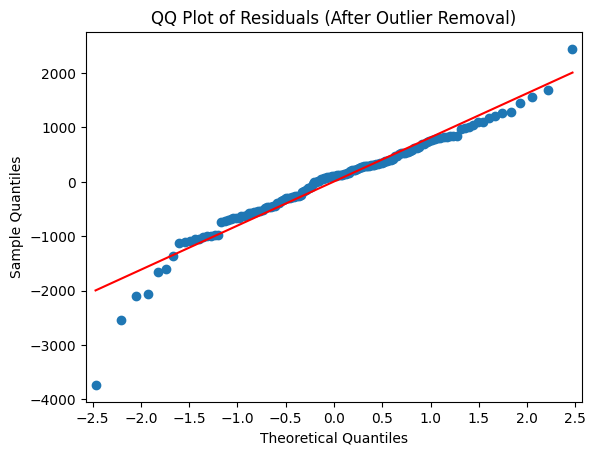

In [ ]:
# 랜포 모델 학습 후 예측한 결과
residuals_cleaned = y_test- y_pred

# QQ 플롯 생성
sm.qqplot(residuals_cleaned, line='s')  # 's'는 기준선을 의미합니다.

# 가로축 간격을 0.5로 설정
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(0.5))

# QQ 플롯에 제목 추가
plt.title('QQ Plot of Residuals (After Outlier Removal)')

# 그래프 표시

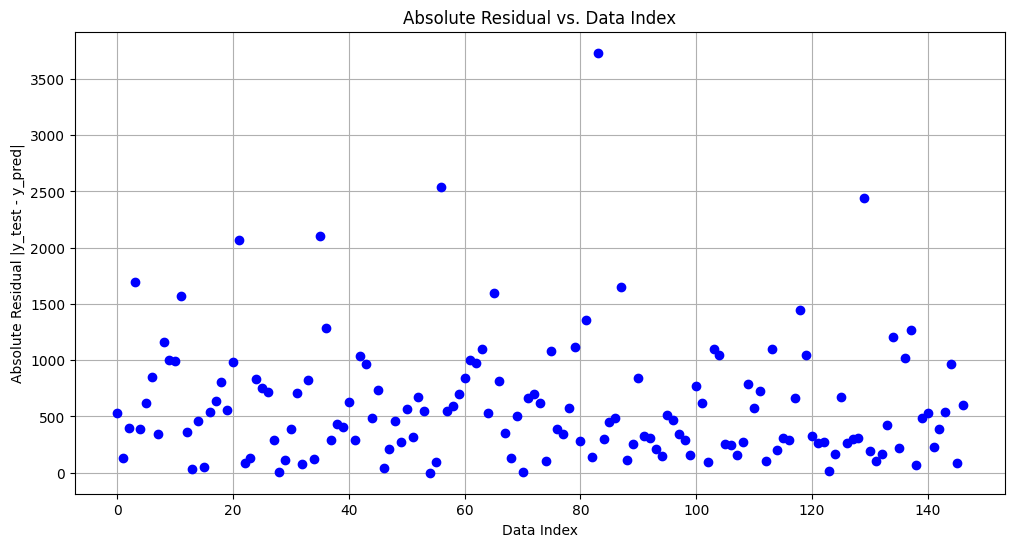

In [ ]:
# 예측 결과와 실제 결과 간의 잔차 계산 및 절대값 적용
residuals = abs(y_test - y_pred)

# 데이터 순서에 따른 절대값 잔차 시각화
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), residuals, marker='o', linestyle='', color='b')  # linestyle을 ''로 설정하여 선을 없앰
plt.xlabel('Data Index')
plt.ylabel('Absolute Residual |y_test - y_pred|')
plt.title('Absolute Residual vs. Data Index')
plt.grid(True)
plt.show()

#4. hour데이터 모델값

##변수 처리하기

In [ ]:
# day 변수 설정
wdc_hour['dteday'] = pd.to_datetime(wdc_hour['dteday'])
wdc_hour['day'] = wdc_hour['dteday'].dt.day

# 날짜 변환 및 범주형 변수 설정
selected_columns = ['day', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
wdc_hour = wdc_hour[selected_columns]  # data를 wdc_hour로 변경

# 범주형 데이터 처리 (예: 원-핫 인코딩)
wdc_hour = pd.get_dummies(wdc_hour, columns=['day','season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'])

# 결측치 처리 (예: 평균값으로 대체)
wdc_hour = wdc_hour.fillna(wdc_hour.mean())

# 'cnt'와 'instant'를 제외한 변수들을 X로 사용, 'cnt'를 y로 사용
X = wdc_hour.drop(['cnt'], axis=1).values.astype(np.float32)
y = wdc_hour['cnt'].values.astype(np.float32)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##초기 모델값

In [ ]:
#여러 모델들의 초기값
# Ridge 모델
ridge = Ridge(alpha=1.0)  # alpha는 규제 강도를 조절하는 매개변수입니다.
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)
ridge_mae = mean_absolute_error(y_test, ridge_preds)
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_rmse = np.sqrt(ridge_mse)

# Lasso 모델
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)
lasso_mae = mean_absolute_error(y_test, lasso_preds)
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_rmse = np.sqrt(lasso_mse)

# 선형 회귀 모델
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_preds = linear_reg.predict(X_test)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_preds)
linear_reg_mse = mean_squared_error(y_test, linear_reg_preds)
linear_reg_rmse = np.sqrt(linear_reg_mse)

# SVR 모델
svr = SVR()
svr.fit(X_train, y_train)
svr_preds = svr.predict(X_test)
svr_mae = mean_absolute_error(y_test, svr_preds)
svr_mse = mean_squared_error(y_test, svr_preds)
svr_rmse = np.sqrt(svr_mse)

# 랜덤 포레스트 모델
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
rf_preds = random_forest.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)

# 결과 출력
print("Ridge 모델:")
print(f"MAE: {ridge_mae}")
print(f"MSE: {ridge_mse}")
print(f"RMSE: {ridge_rmse}")
print()

print("Lasso 모델:")
print(f"MAE: {lasso_mae}")
print(f"MSE: {lasso_mse}")
print(f"RMSE: {lasso_rmse}")
print()

print("선형 회귀 모델:")
print(f"MAE: {linear_reg_mae}")
print(f"MSE: {linear_reg_mse}")
print(f"RMSE: {linear_reg_rmse}")
print()

print("SVR 모델:")
print(f"MAE: {svr_mae}")
print(f"MSE: {svr_mse}")
print(f"RMSE: {svr_rmse}")
print()

print("랜덤 포레스트 모델:")
print(f"MAE: {rf_mae}")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")

Ridge 모델:
MAE: 74.28265380859375
MSE: 10110.9912109375
RMSE: 100.55342102050781

Lasso 모델:
MAE: 75.87541198730469
MSE: 10713.0703125
RMSE: 103.50395965576172

선형 회귀 모델:
MAE: 74.29972839355469
MSE: 10114.2587890625
RMSE: 100.56967163085938

SVR 모델:
MAE: 99.6265066197983
MSE: 21867.05736051434
RMSE: 147.87514111747905

랜덤 포레스트 모델:
MAE: 29.498711162255464
MSE: 2220.461934867664
RMSE: 47.12177771336374


##하이퍼파라미터 튜닝

In [ ]:
#하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer, mean_absolute_error

# Ridge 모델
ridge = Ridge()

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]  # alpha 값을 여러 가지로 시도해보세요.
}

# MAE를 평가 지표로 사용
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

# 최적의 alpha 값을 사용하여 Ridge 모델을 학습
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)

# MAE, MSE, RMSE, R-squared 계산
ridge_mae = mean_absolute_error(y_test, ridge_preds)
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_rmse = np.sqrt(ridge_mse)

# 결과 출력
print("Ridge 모델 (튜닝 후):")
print(f"MAE: {ridge_mae}")
print(f"MSE: {ridge_mse}")
print(f"RMSE: {ridge_rmse}")

Ridge 모델 (튜닝 후):
MAE: 74.26869201660156
MSE: 10107.9169921875
RMSE: 100.53813934326172


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
# Lasso 모델 생성
lasso = Lasso()

# 탐색할 alpha 값의 후보 리스트
alphas = np.linspace(0.001, 1, 100)  # 원하는 범위와 간격으로 수정

# GridSearchCV 설정
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# 모델 훈련
grid_search.fit(X_train, y_train)

# 최적의 alpha 값 찾기
best_alpha = grid_search.best_params_['alpha']

# 최적의 alpha 값을 사용하여 Lasso 모델을 다시 훈련
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

# 테스트 세트에 대한 예측
lasso_preds = lasso.predict(X_test)

# 평가 지표 계산
lasso_mae = mean_absolute_error(y_test, lasso_preds)
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_rmse = np.sqrt(lasso_mse)

# 결과 출력
print("Lasso 모델 (하이퍼파라미터 튜닝 후):")
print(f"최적의 alpha: {best_alpha}")
print(f"MAE: {lasso_mae}")
print(f"MSE: {lasso_mse}")
print(f"RMSE: {lasso_rmse}")

Lasso 모델 (하이퍼파라미터 튜닝 후):
최적의 alpha: 0.06154545454545455
MAE: 74.07549285888672
MSE: 10090.3662109375
RMSE: 100.45081329345703


## 최적의 모델 결과 시각화

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 랜덤 포레스트 모델 생성
random_forest = RandomForestRegressor(random_state=42)

# 탐색할 하이퍼파라미터 그리드 설정 (Randomized Search)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# GridSearchCV 객체 생성
grid_search = GridSearchCV(random_forest, param_grid=param_dist, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, refit=True)

# 모델 훈련 및 최적의 하이퍼파라미터 탐색
grid_search.fit(X_train, y_train)

# GridSearchCV의 결과를 가져와서 출력
results = grid_search.cv_results_
param_names = list(param_dist.keys())

for i in range(len(results['params'])):
    params = results['params'][i]
    mean_mse = -results['mean_test_score'][i]
    std_mse = results['std_test_score'][i]

    print(f"Hyperparameters: {', '.join([f'{param_names[j]}={params[param_names[j]]}' for j in range(len(param_names))])}")
    print(f"Mean MSE: {mean_mse:.4f}, Std MSE: {std_mse:.4f}")
    print()

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print("최적의 하이퍼파라미터:", best_params)

# 최적의 모델 얻기
best_rf_model = grid_search.best_estimator_

# 테스트 세트에 대한 예측
rf_preds = best_rf_model.predict(X_test)

# 평가 지표 계산
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)

# 결과 출력
print("랜덤 포레스트 모델 (최적 하이퍼파라미터 - Grid Search):")
print(f"MAE: {rf_mae}")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Hyperparameters: n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1
Mean MSE: 2687.3510, Std MSE: 102.6373

Hyperparameters: n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1
Mean MSE: 2667.0613, Std MSE: 111.3540

Hyperparameters: n_estimators=300, max_depth=None, min_samples_split=2, min_samples_leaf=1
Mean MSE: 2658.3831, Std MSE: 112.6181

Hyperparameters: n_estimators=100, max_depth=None, min_samples_split=5, min_samples_leaf=1
Mean MSE: 2713.5526, Std MSE: 103.7017

Hyperparameters: n_estimators=200, max_depth=None, min_samples_split=5, min_samples_leaf=1
Mean MSE: 2703.0754, Std MSE: 112.8006

Hyperparameters: n_estimators=300, max_depth=None, min_samples_split=5, min_samples_leaf=1
Mean MSE: 2697.8172, Std MSE: 116.8867

Hyperparameters: n_estimators=100, max_depth=None, min_samples_split=10, min_samples_leaf=1
Mean MSE: 2830.9465, Std MSE: 123.1001

Hyperparameters: n_e

Text(0.5, 1.0, 'QQ Plot of Residuals (After Outlier Removal)')

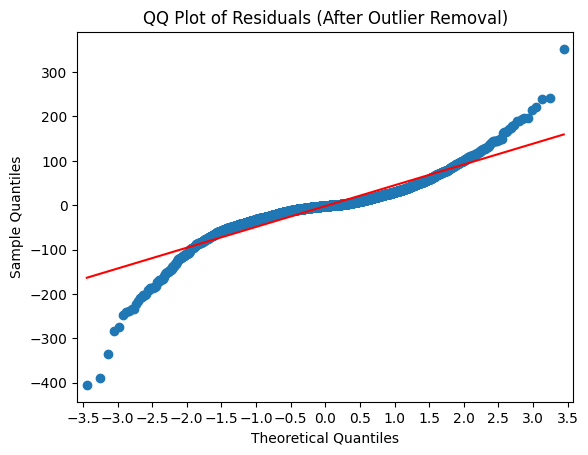

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# 랜포 모델 학습 후 예측한 결과
residuals_cleaned = y_test- rf_preds

# QQ 플롯 생성
sm.qqplot(residuals_cleaned, line='s')  # 's'는 기준선을 의미합니다.

# 가로축 간격을 0.5로 설정
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(0.5))

# QQ 플롯에 제목 추가
plt.title('QQ Plot of Residuals (After Outlier Removal)')

# 그래프 표시

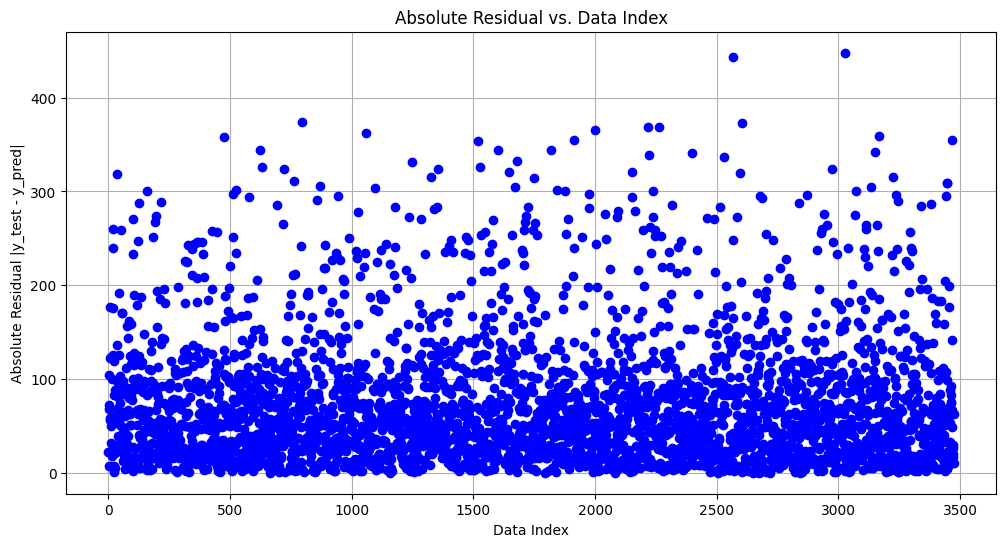

In [ ]:
# 예측 결과와 실제 결과 간의 잔차 계산 및 절대값 적용
residuals = abs(y_test - rf_preds)

# 데이터 순서에 따른 절대값 잔차 시각화
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), residuals, marker='o', linestyle='', color='b')  # linestyle을 ''로 설정하여 선을 없앰
plt.xlabel('Data Index')
plt.ylabel('Absolute Residual |y_test - y_pred|')
plt.title('Absolute Residual vs. Data Index')
plt.grid(True)
plt.show()